## STOCK PRICE PREDICTION USING LSTM

### 1. Importing the libraries

In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

from sklearn.preprocessing import MinMaxScaler

### 2. Importing the training data set

In [87]:
train_df = pd.read_csv('dataset/Google_Stock_Price_Train.csv')
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### 3. Analyze the opening prices from the training data set

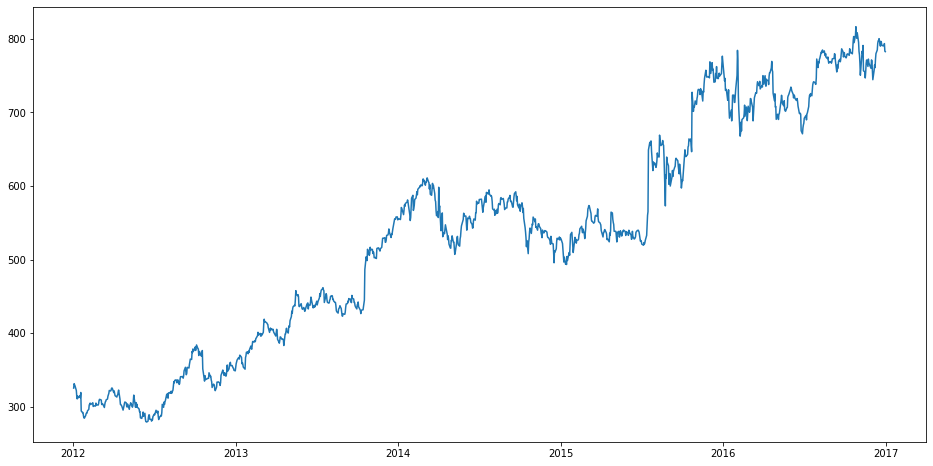

In [88]:
train_df['Date'] = pd.to_datetime(train_df.Date, format='%m/%d/%Y')
train_df.index = train_df['Date']

plt.figure(figsize=(16,8))
plt.plot(train_df['Open'], label='Open price history')

### 4. Sort the dataset on date time and filter "Date" and "Open" columns

In [89]:
train_data = train_df.sort_index(ascending=True, axis=0)
train_data = train_data.iloc[:, [1]]
train_data.head()

,Open
Date,
2012-01-03,325.25
2012-01-04,331.27
2012-01-05,329.83
2012-01-06,328.34
2012-01-09,322.04


### 5. Normalize the new filtered data set

In [90]:
train_data_value = train_data.values

scaler = MinMaxScaler(feature_range=(0,1))
train_data_scaled = scaler.fit_transform(train_data_value)

### 6. Create a data structure with 60 timesteps and 1 output

In [91]:
x_train_data, y_train_data = [], []

for i in range(60, len(train_data_scaled)):
    x_train_data.append(train_data_scaled[i-60:i, 0])
    y_train_data.append(train_data_scaled[i, 0])

### 7. Data reshaping

In [92]:
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

### 8. Create the LSTM model

In [93]:
regressor = Sequential()

In [94]:
# 1st layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

# 2nd, 3rd, 4th layer
for i in range(0, 3):
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(rate = 0.2))

# 5th layer
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate = 0.2))

In [95]:
regressor.add(Dense(units=1))

In [96]:
regressor_large_time_scale = Sequential()

# 1st layer
regressor_large_time_scale.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
regressor_large_time_scale.add(Dropout(rate = 0.2))

# 2nd, 3rd, 4th layer
for i in range(0, 3):
    regressor_large_time_scale.add(LSTM(units=50, return_sequences=True))
    regressor_large_time_scale.add(Dropout(rate = 0.2))

# 5th layer
regressor_large_time_scale.add(LSTM(units=50, return_sequences=False))
regressor_large_time_scale.add(Dropout(rate = 0.2))

regressor_large_time_scale.add(Dense(units=1))

### 9. Compile the LSTM model

In [97]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [98]:
regressor_large_time_scale.compile(optimizer='adam', loss='mean_squared_error')

### 10. Fit the LSTM model to the training set

In [99]:
regressor.fit(x_train_data, y_train_data, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 11s 96ms/step - loss: 0.0453
Epoch 2/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0078
Epoch 3/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0078
Epoch 4/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0065
Epoch 5/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0063
Epoch 6/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0062
Epoch 7/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0067
Epoch 8/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0055
Epoch 9/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0057
Epoch 10/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0053
Epoch 13/100
38/38 [====

In [100]:
regressor_large_time_scale.fit(x_train_data, y_train_data, epochs=250, batch_size=64)

Epoch 1/250
19/19 [==============================] - 9s 140ms/step - loss: 0.0756
Epoch 2/250
19/19 [==============================] - 3s 137ms/step - loss: 0.0121
Epoch 3/250
19/19 [==============================] - 3s 137ms/step - loss: 0.0069
Epoch 4/250
19/19 [==============================] - 3s 136ms/step - loss: 0.0070
Epoch 5/250
19/19 [==============================] - 3s 136ms/step - loss: 0.0063
Epoch 6/250
19/19 [==============================] - 3s 136ms/step - loss: 0.0054
Epoch 7/250
19/19 [==============================] - 3s 137ms/step - loss: 0.0060
Epoch 8/250
19/19 [==============================] - 3s 136ms/step - loss: 0.0059
Epoch 9/250
19/19 [==============================] - 3s 136ms/step - loss: 0.0056
Epoch 10/250
19/19 [==============================] - 3s 136ms/step - loss: 0.0060
Epoch 11/250
19/19 [==============================] - 3s 136ms/step - loss: 0.0057
Epoch 12/250
19/19 [==============================] - 3s 136ms/step - loss: 0.0057
Epoch 13/250


### 11. Import the testing data set

In [101]:
test_df = pd.read_csv('dataset/Google_Stock_Price_Test.csv')
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


### 12. Data processing

In [102]:
test_data = test_df.sort_index(ascending=True, axis=0)
test_data = test_data.iloc[:, [1]]

test_data_value = test_data.values

total_data = pd.concat((train_df['Open'], test_df['Open']), axis=0)

### 13. Prepare inputs for prediction


In [103]:
inputs = total_data[len(total_data) - len(test_data) - 60:].values

### 14. Normalize and create the data structure

In [104]:
inputs = inputs.reshape(-1,1)

inputs = scaler.transform(inputs)

x_test_data = []
for i in range(60, len(inputs)):
    x_test_data.append(inputs[i-60:i, 0])

x_test_data = np.array(x_test_data)
x_test_data = np.reshape(x_test_data, (x_test_data.shape[0], x_test_data.shape[1], 1))

### 15. Predict the stock price using the LSTM model

In [105]:
predicted_stock_price = regressor.predict(x_test_data)

1/1 [==============================] - 2s 2s/step


In [106]:
predicted_stock_price_large_time_scale = regressor_large_time_scale.predict(x_test_data)

1/1 [==============================] - 2s 2s/step


### 16. Invert the scaling of the predicted stock price

In [107]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [108]:
predicted_stock_price_large_time_scale = scaler.inverse_transform(predicted_stock_price_large_time_scale)

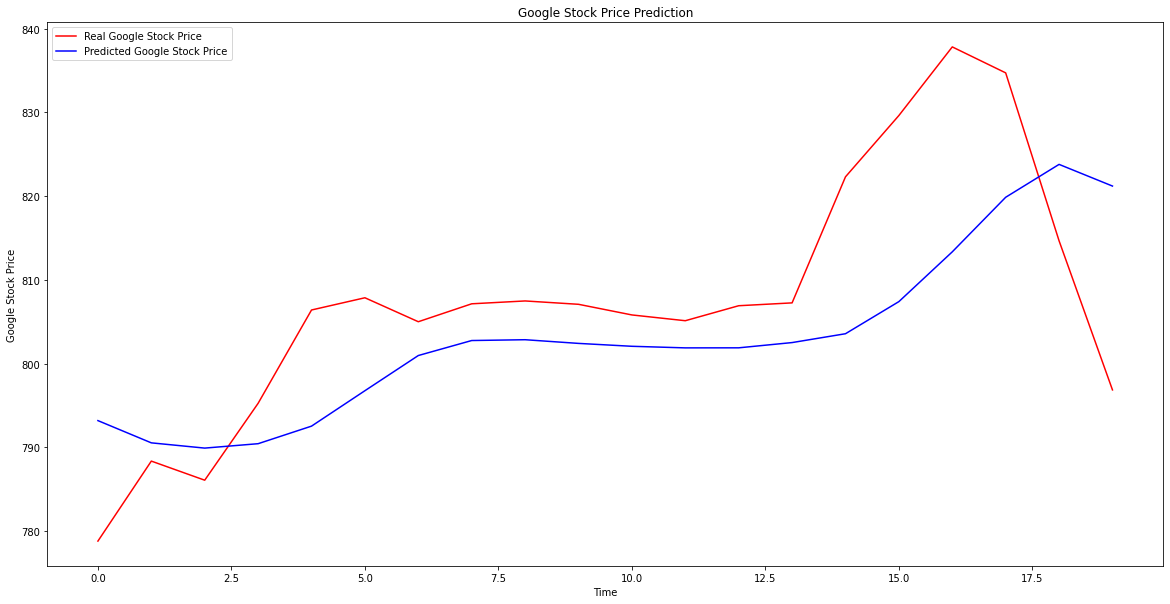

In [109]:
plt.plot(test_data_value, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')

plt.legend()
plt.show()

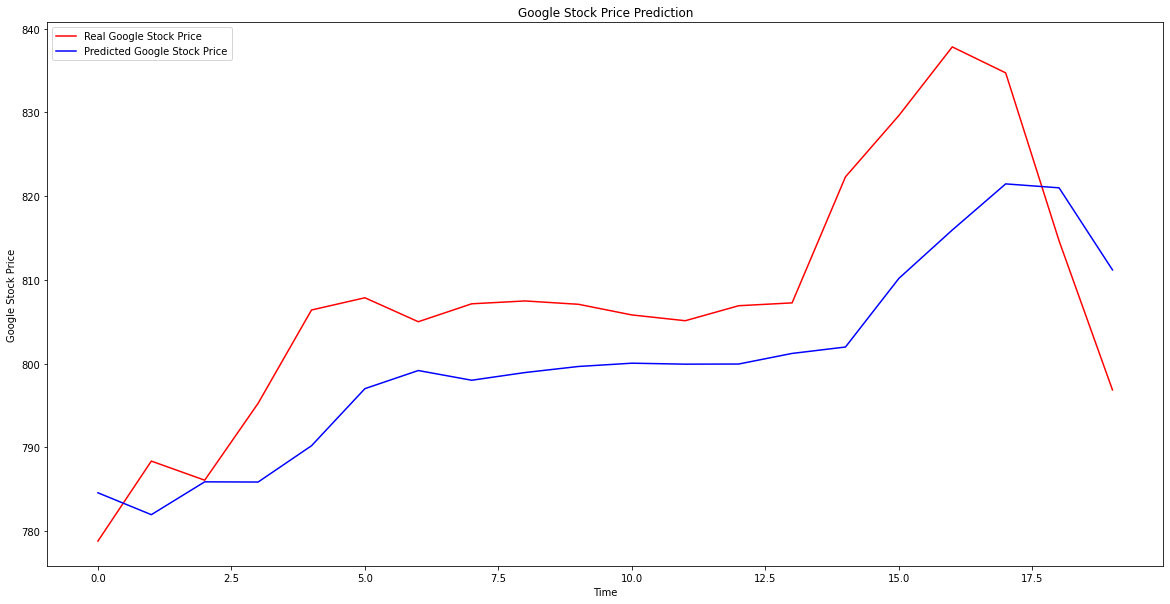

In [110]:
plt.plot(test_data_value, color='red', label='Real Google Stock Price Large Scale')
plt.plot(predicted_stock_price_large_time_scale, color='blue', label='Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')

plt.legend()
plt.show()